# Credit Card Fraud Detection

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Files

In [2]:
# Import the dataset
df = pd.read_csv('D:\Data Science\Projects\Credit Card Fraud Detection\Data\creditcard.csv')

In [4]:
# Check 15 random samples of the dataset
df.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38317,39340.0,1.089491,-0.655954,0.753135,-0.180513,-0.868392,0.229284,-0.703278,0.159435,0.982623,...,0.094280,0.292063,-0.116003,-0.345656,0.104449,1.544444,-0.063003,0.013755,83.52,0
239094,149950.0,-1.416220,0.330829,-0.423536,-2.283960,-0.049715,0.072600,1.603711,-0.003576,0.753511,...,-0.194582,0.248751,0.307103,0.314163,-0.490105,0.883511,0.288367,-0.299811,210.00,0
66725,52188.0,-0.398661,0.846412,2.748237,2.237241,-0.697604,0.466812,-0.212221,0.396271,-0.893983,...,0.427843,1.148793,-0.036359,0.533092,-0.768026,0.075861,0.193385,0.177174,23.64,0
177327,123132.0,-0.111782,-0.248542,0.104490,-1.995493,-1.560381,0.837253,1.156639,-0.339106,-0.562586,...,0.355538,1.270241,-0.132554,-0.988782,-0.288213,-0.087279,0.044484,-0.079787,324.00,0
79268,57945.0,1.239009,0.048368,0.353644,0.446088,-0.435264,-0.524232,-0.180653,0.073928,0.104446,...,-0.250004,-0.853593,0.106226,-0.061137,0.165469,0.104310,-0.046140,0.001297,1.98,0
230490,146350.0,1.839303,-0.658990,-1.318029,0.271534,1.650956,4.230737,-1.334916,1.159807,1.013593,...,0.074062,0.180545,0.282958,0.660041,-0.314983,-0.738293,0.090650,-0.019662,45.00,0
78221,57426.0,-0.468102,0.840096,1.626262,-0.078563,-0.315862,-0.747982,0.443268,0.199858,-0.317092,...,-0.190744,-0.634419,0.013950,0.453072,-0.330768,0.048945,0.247292,0.107745,0.89,0
242138,151358.0,2.329298,-1.377722,-0.970346,-1.620858,-1.146113,-0.537416,-1.145965,-0.223089,-1.094738,...,-0.201314,-0.033190,0.153938,-0.725947,-0.142449,-0.134940,0.021796,-0.052560,19.60,0
217769,141027.0,-1.354593,-0.284441,0.937199,0.043240,0.251923,1.039378,-0.281296,1.001052,0.686387,...,0.032871,-0.272442,0.040801,-1.542456,-0.248890,-0.872470,0.066122,0.010701,109.41,0
168002,119015.0,2.326337,-1.214069,-1.609494,-1.893037,-0.497076,-0.289040,-0.862898,-0.183869,-1.910416,...,0.099242,0.739764,0.035178,0.252558,0.146628,0.048139,-0.015784,-0.067821,15.00,0


In [5]:
# Check the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Looks like there isn't any missing values in the dataset.

## Exploratory Data Analysis

In [6]:
# Check the summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The author of the dataset mentioned that V1, V2, ..., V28 are features resulting from PCA done before. It is reflected in the result above that the values of V1, V2, ..., V28 are on a similar scale.

In [12]:
def distribution_check(feature):
    '''
    This function will output the histogram and boxplot of a feature.
    '''

    # Create the figure
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    # Plot the histogram 
    sns.histplot(df[feature], kde=True, ax=ax[0])
    ax[0].set_title(f'{feature} Distribution (Histogram)')
    ax[0].grid(True)
    ax[0].set_axisbelow(True)

    # Plot the boxplot
    sns.boxplot(x=df[feature], ax=ax[1])
    ax[1].set_title(f'{feature} Distribution (Boxplot)')
    ax[1].grid(True)
    ax[1].set_axisbelow(True)

    # Show the plots
    plt.tight_layout()
    plt.show()


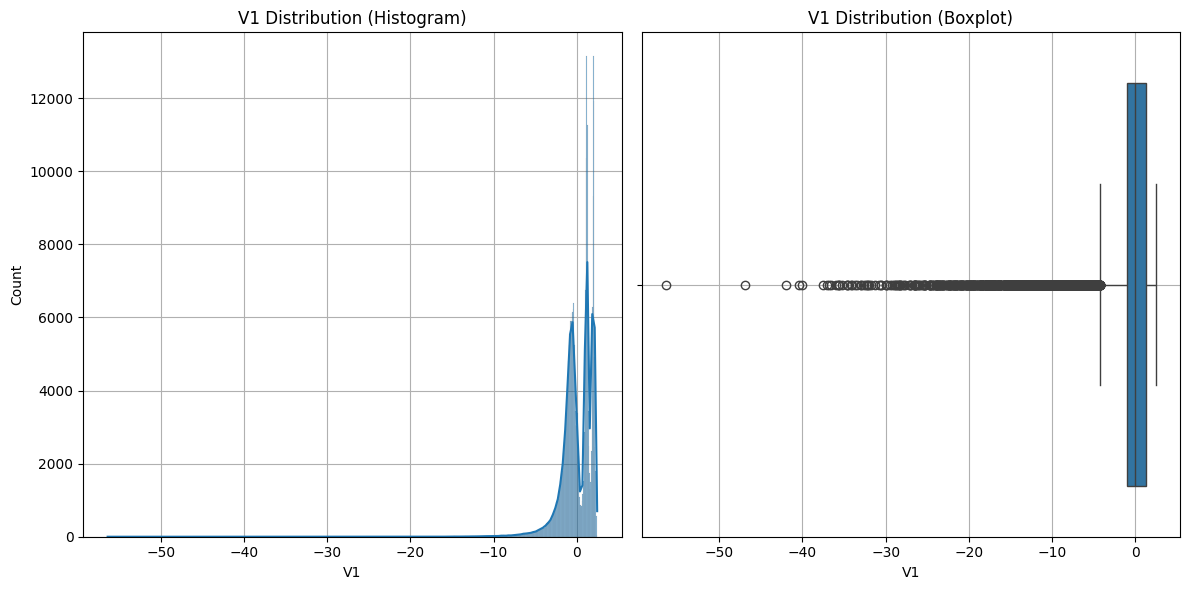

In [13]:
distribution_check('V1')

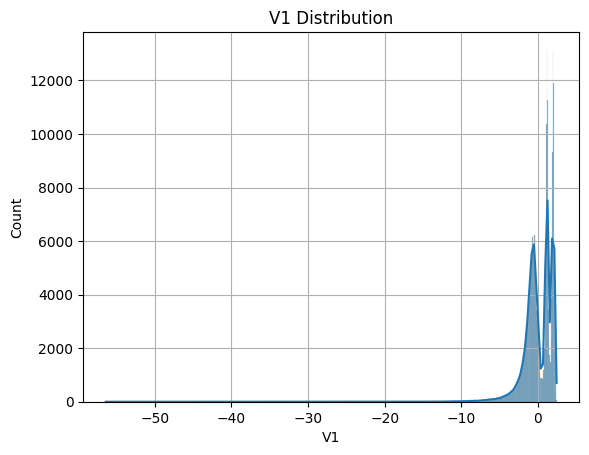

In [8]:
# Check the distribution of the dataset
sns.histplot(df['V1'], kde=True)
plt.title('V1 Distribution')
plt.grid()
plt.show()

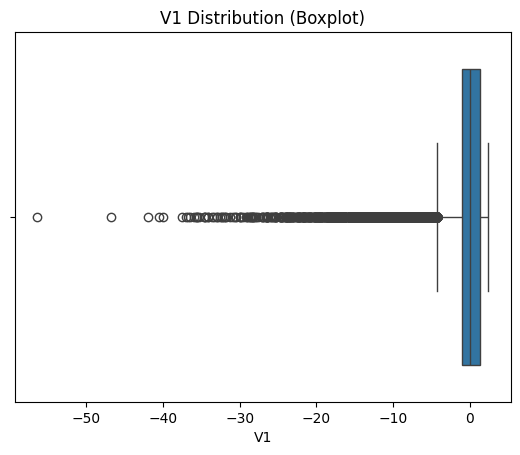

In [9]:
sns.boxplot(x=df['V1'])
plt.title('V1 Distribution (Boxplot)')
plt.show()